In [1]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib notebook

In [2]:
train = pd.read_csv('./train.csv')

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<IPython.core.display.Javascript object>


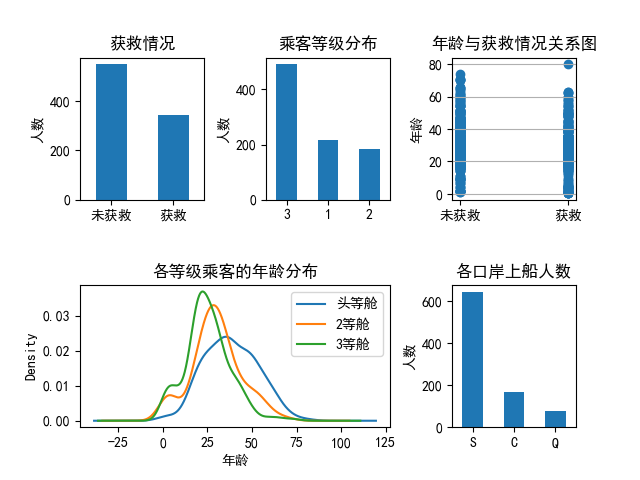

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

In [5]:
fig = plt.figure()
fig.set(alpha=0.5)
fig.tight_layout()#调整整体空白
plt.subplots_adjust(wspace =0.5, hspace =0.6)#调整子图间距

#显示中文
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False

#train中的获救情况
plt.subplot2grid((2,3), (0,0))
train['Survived'].value_counts().plot.bar()
plt.title('获救情况')
plt.ylabel('人数')
plt.xticks([0,1],('未获救','获救'),rotation=0)

#train中的乘客等级分布
plt.subplot2grid((2,3), (0,1))
train['Pclass'].value_counts().plot.bar()
plt.title('乘客等级分布')
plt.ylabel('人数')
plt.xticks(rotation=0)

#train中年龄与获救情况关系图
plt.subplot2grid((2,3),(0,2))
plt.scatter(train['Survived'], train['Age'])
plt.ylabel('年龄')
plt.title('年龄与获救情况关系图')
plt.xticks([0,1],('未获救','获救'))
plt.grid(b=True, which='major', axis='y')

#train各等级乘客的年龄分布
plt.subplot2grid((2,3),(1,0), colspan=2)
train['Age'][train.Pclass == 1].plot.kde()
train['Age'][train.Pclass == 2].plot.kde()
train['Age'][train.Pclass == 3].plot.kde()
plt.xlabel('年龄')
plt.title('各等级乘客的年龄分布')
plt.legend(('头等舱','2等舱','3等舱'), loc='best')

#train中各口岸上船人数
plt.subplot2grid((2,3),(1,2))
train['Embarked'].value_counts().plot.bar()
plt.title('各口岸上船人数')
plt.ylabel('人数')
plt.xticks(rotation=0)

<IPython.core.display.Javascript object>


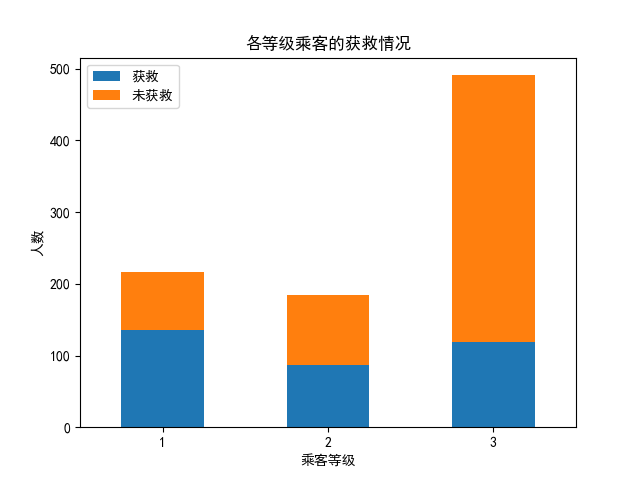

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

In [6]:
survived_1 = train['Pclass'][train.Survived == 1].value_counts()
survived_0 = train['Pclass'][train.Survived == 0].value_counts()
df = pd.DataFrame({'获救':survived_1, '未获救': survived_0})
df.plot.bar(stacked=True)
plt.title('各等级乘客的获救情况')
plt.xlabel('乘客等级')
plt.ylabel('人数')
plt.xticks(rotation=0)

<IPython.core.display.Javascript object>


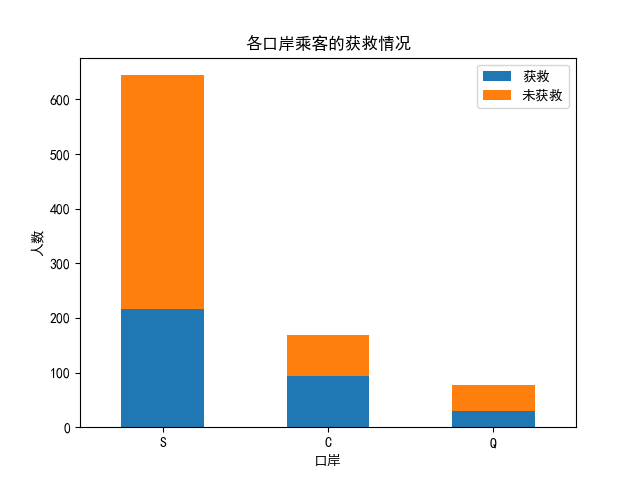

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

In [7]:
survived_0_e = train['Embarked'][train.Survived == 0].value_counts() 
survived_1_e = train['Embarked'][train.Survived == 1].value_counts()
df_e = pd.DataFrame({'获救': survived_1_e, '未获救': survived_0_e})
df_e.plot.bar(stacked=True)
plt.title('各口岸乘客的获救情况')
plt.xlabel('口岸')
plt.ylabel('人数')
plt.xticks(rotation=0)

<IPython.core.display.Javascript object>


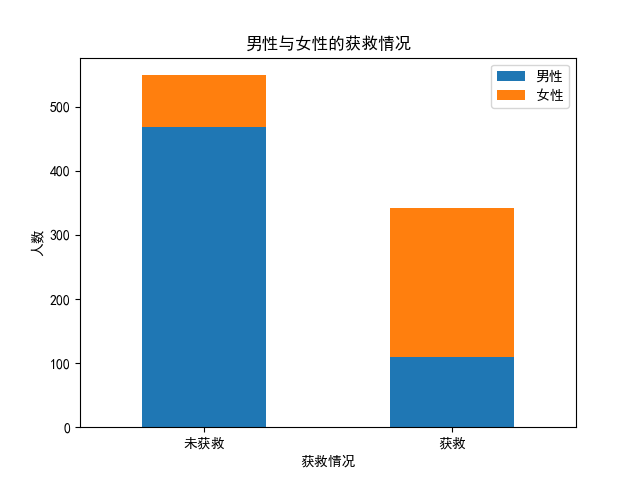

Text(0, 0.5, '人数')

In [8]:
survived_m = train['Survived'][train.Sex == 'male'].value_counts()
survived_f = train['Survived'][train.Sex == 'female'].value_counts()
df = pd.DataFrame({'男性':survived_m, '女性':survived_f})
df.plot.bar(stacked=True)
plt.title('男性与女性的获救情况')
plt.xlabel('获救情况')
plt.xticks([0,1], ['未获救','获救'], rotation=0)
plt.ylabel('人数')

<IPython.core.display.Javascript object>


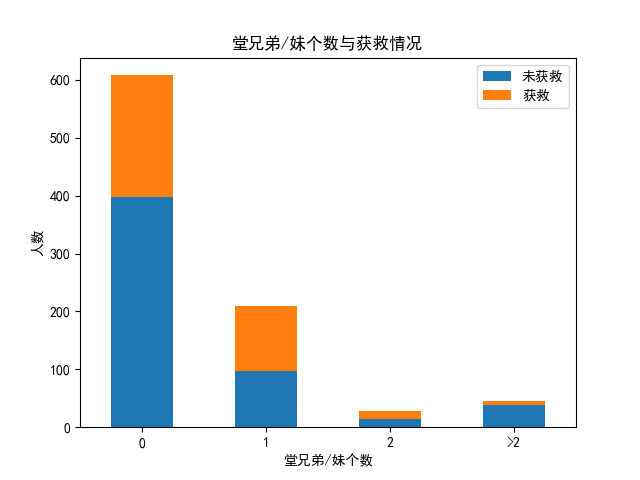

In [9]:
data_sibsp = train.groupby(['SibSp','Survived'])
df_s = pd.DataFrame(data_sibsp.count()['PassengerId'])
df_s = df_s.unstack()
df_s = df_s.append(df_s.loc[3:].sum(),ignore_index=True)
df_s.loc[[0,1,2,7],:].plot.bar(stacked=True)
plt.title('堂兄弟/妹个数与获救情况')
plt.xlabel('堂兄弟/妹个数')
plt.ylabel('人数')
plt.xticks([0,1,2,3],[0,1,2,'>2'], rotation=0)
plt.legend(('未获救','获救'))

<IPython.core.display.Javascript object>


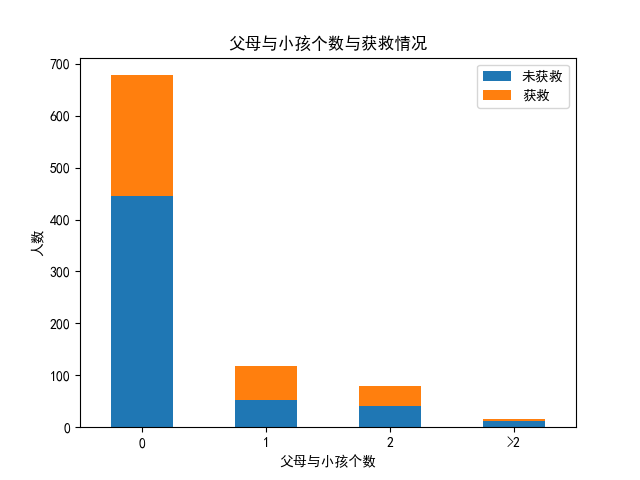

In [10]:
data_parch = train.groupby(['Parch','Survived'])
df_p = pd.DataFrame(data_parch.count()['PassengerId'])
df_p = df_p.unstack()
df_p = df_p.append(df_p.loc[3:].sum(),ignore_index=True)
df_p.loc[[0,1,2,7],:].plot.bar(stacked=True)
plt.title('父母与小孩个数与获救情况')
plt.xlabel('父母与小孩个数')
plt.ylabel('人数')
plt.xticks([0,1,2,3],[0,1,2,'>2'], rotation=0)
plt.legend(('未获救','获救'))

In [11]:
train['Cabin'].value_counts()

G6             4
B96 B98        4
C23 C25 C27    4
D              3
F33            3
              ..
D28            1
C47            1
A23            1
B86            1
F38            1
Name: Cabin, Length: 147, dtype: int64

In [12]:
from sklearn.ensemble import RandomForestRegressor as RFR

In [15]:
# 使用 RandomForestClassifier 填补缺失的年龄属性
def set_missing_ages(df):
    
    # 把已有的数值型特征取出来丢进Random Forest Regressor中
    age_df = df[['Age','Fare', 'Parch', 'SibSp', 'Pclass']]

    # 乘客分成已知年龄和未知年龄两部分
    known_age = np.array(age_df[age_df.Age.notnull()])
    unknown_age = np.array(age_df[age_df.Age.isnull()])

    # y即目标年龄
    y = known_age[:, 0]

    # X即特征属性值
    X = known_age[:, 1:]

    # fit到RandomForestRegressor之中
    rfr = RFR(random_state=0, n_estimators=2000, n_jobs=-1)
    rfr.fit(X, y)
    
    # 用得到的模型进行未知年龄结果预测
    predictedAges = rfr.predict(unknown_age[:, 1::])
    
    # 用得到的预测结果填补原缺失数据
    df.loc[ (df.Age.isnull()), 'Age' ] = predictedAges 
    
    return df, rfr

def set_Cabin_type(df):
    df.loc[ (df.Cabin.notnull()), 'Cabin' ] = "Yes"
    df.loc[ (df.Cabin.isnull()), 'Cabin' ] = "No"
    return df

train, rfr = set_missing_ages(train)
train = set_Cabin_type(train)

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [17]:
dummies_Cabin = pd.get_dummies(train['Cabin'], prefix= 'Cabin')

dummies_Embarked = pd.get_dummies(train['Embarked'], prefix= 'Embarked')

dummies_Sex = pd.get_dummies(train['Sex'], prefix= 'Sex')

dummies_Pclass = pd.get_dummies(train['Pclass'], prefix= 'Pclass')

df = pd.concat([train, dummies_Cabin, dummies_Embarked, dummies_Sex, dummies_Pclass], axis=1)
df.drop(['Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)
df.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,1,0,22.0,1,0,7.2500,1,0,0,0,1,0,1,0,0,1
1,2,1,38.0,1,0,71.2833,0,1,1,0,0,1,0,1,0,0
2,3,1,26.0,0,0,7.9250,1,0,0,0,1,1,0,0,0,1
3,4,1,35.0,1,0,53.1000,0,1,0,0,1,1,0,1,0,0
4,5,0,35.0,0,0,8.0500,1,0,0,0,1,0,1,0,0,1


In [21]:
import sklearn.preprocessing as preprocessing
scaler = preprocessing.StandardScaler()
age_scale_param = scaler.fit(df['Age'].values.reshape(-1,1))
df['Age_scaled'] = scaler.fit_transform(df['Age'].values.reshape(-1,1), age_scale_param)
fare_scale_param = scaler.fit(df['Fare'].values.reshape(-1,1))
df['Fare_scaled'] = scaler.fit_transform(df['Fare'].values.reshape(-1,1), fare_scale_param)
df.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Age_scaled,Fare_scaled
0,1,0,22.0,1,0,7.2500,1,0,0,0,1,0,1,0,0,1,-0.561380,-0.502445
1,2,1,38.0,1,0,71.2833,0,1,1,0,0,1,0,1,0,0,0.613171,0.786845
2,3,1,26.0,0,0,7.9250,1,0,0,0,1,1,0,0,0,1,-0.267742,-0.488854
3,4,1,35.0,1,0,53.1000,0,1,0,0,1,1,0,1,0,0,0.392942,0.420730
4,5,0,35.0,0,0,8.0500,1,0,0,0,1,0,1,0,0,1,0.392942,-0.486337


In [24]:
from sklearn import linear_model

# 用正则取出我们要的属性值
train_df = df.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
train_np = np.array(train_df)

# y即Survival结果
y = train_np[:, 0]

# X即特征属性值
X = train_np[:, 1:]

# fit到RandomForestRegressor之中
clf = linear_model.LogisticRegression(C=1.0, penalty='l2', tol=1e-6)
clf.fit(X, y)
    
clf

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=1e-06, verbose=0,
                   warm_start=False)

In [27]:
data_test = pd.read_csv("./test.csv")
data_test.loc[ (data_test.Fare.isnull()), 'Fare' ] = 0
# 接着我们对test_data做和train_data中一致的特征变换
# 首先用同样的RandomForestRegressor模型填上丢失的年龄
tmp_df = data_test[['Age','Fare', 'Parch', 'SibSp', 'Pclass']]
null_age = np.array(tmp_df[data_test.Age.isnull()])
# 根据特征属性X预测年龄并补上
X = null_age[:, 1:]
predictedAges = rfr.predict(X)
data_test.loc[ (data_test.Age.isnull()), 'Age' ] = predictedAges

data_test = set_Cabin_type(data_test)
dummies_Cabin = pd.get_dummies(data_test['Cabin'], prefix= 'Cabin')
dummies_Embarked = pd.get_dummies(data_test['Embarked'], prefix= 'Embarked')
dummies_Sex = pd.get_dummies(data_test['Sex'], prefix= 'Sex')
dummies_Pclass = pd.get_dummies(data_test['Pclass'], prefix= 'Pclass')


df_test = pd.concat([data_test, dummies_Cabin, dummies_Embarked, dummies_Sex, dummies_Pclass], axis=1)
df_test.drop(['Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)
df_test['Age_scaled'] = scaler.fit_transform(df_test['Age'].values.reshape(-1,1), age_scale_param)
df_test['Fare_scaled'] = scaler.fit_transform(df_test['Fare'].values.reshape(-1,1), fare_scale_param)
df_test

,PassengerId,Age,SibSp,Parch,Fare,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Age_scaled,Fare_scaled
0,892,34.500000,0,0,7.8292,1,0,0,1,0,0,1,0,0,1,0.307521,-0.496637
1,893,47.000000,1,0,7.0000,1,0,0,0,1,1,0,0,0,1,1.256241,-0.511497
2,894,62.000000,0,0,9.6875,1,0,0,1,0,0,1,0,1,0,2.394706,-0.463335
3,895,27.000000,0,0,8.6625,1,0,0,0,1,0,1,0,0,1,-0.261711,-0.481704
4,896,22.000000,1,1,12.2875,1,0,0,0,1,1,0,0,0,1,-0.641199,-0.416740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,30.705727,0,0,8.0500,1,0,0,0,1,0,1,0,0,1,0.019545,-0.492680
414,1306,39.000000,0,0,108.9000,0,1,1,0,0,1,0,1,0,0,0.649061,1.314641
415,1307,38.500000,0,0,7.2500,1,0,0,0,1,0,1,0,0,1,0.611112,-0.507017
416,1308,30.705727,0,0,8.0500,1,0,0,0,1,0,1,0,0,1,0.019545,-0.492680


In [31]:
test = df_test.filter(regex='Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
predictions = clf.predict(test)
result = pd.DataFrame({'PassengerId':np.array(data_test['PassengerId']), 'Survived':predictions.astype(np.int32)})
result.to_csv("./logistic_regression_predictions.csv", index=False)

In [32]:
pd.DataFrame({"columns":list(train_df.columns)[1:], "coef":list(clf.coef_.T)})

,columns,coef
0,SibSp,[-0.3496950029813759]
1,Parch,[-0.11594682707889492]
2,Cabin_No,[-0.46682236344400657]
3,Cabin_Yes,[0.46674057221143456]
4,Embarked_C,[0.09105236312064904]
5,Embarked_Q,[0.08401648460631725]
6,Embarked_S,[-0.3498574869157215]
7,Sex_female,[1.3157857715685497]
8,Sex_male,[-1.3158675628011192]
9,Pclass_1,[0.6176426154602176]


In [46]:
from sklearn import model_selection

#简单看看打分情况
clf = linear_model.LogisticRegression(C=1.0, penalty='l2', tol=1e-6)
all_data = df.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
X = np.array(all_data)[:,1:]
y = np.array(all_data)[:,0]
print(model_selection.cross_val_score(clf, X, y, cv=5))

[0.81564246 0.80898876 0.79213483 0.78651685 0.81460674]


In [51]:
# 分割数据，按照 训练数据:cv数据 = 7:3的比例
split_train, split_cv = model_selection.train_test_split(df, test_size=0.3, random_state=0)
train_df = split_train.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')




In [53]:
# 生成模型
clf = linear_model.LogisticRegression(C=1.0, penalty='l2', tol=1e-6)
clf.fit(np.array(train_df)[:,1:], np.array(train_df)[:,0])

# 对cross validation数据进行预测
cv_df = split_cv.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
predictions = clf.predict(np.array(cv_df)[:,1:])

origin_data_train = pd.read_csv("./Train.csv")
bad_cases = origin_data_train.loc[origin_data_train['PassengerId'].isin(split_cv[predictions != np.array(cv_df)[:,0]]['PassengerId'].values)]
bad_cases

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.00,0,0,350406,7.8542,NaN,S
49,50,0,3,"Arnold-Franchi, Mrs. Josef (Josefine Franchi)",female,18.00,1,0,349237,17.8000,NaN,S
55,56,1,1,"Woolner, Mr. Hugh",male,NaN,0,0,19947,35.5000,C52,S
65,66,1,3,"Moubarek, Master. Gerios",male,NaN,1,1,2661,15.2458,NaN,C
68,69,1,3,"Andersson, Miss. Erna Alexandra",female,17.00,4,2,3101281,7.9250,NaN,S
85,86,1,3,"Backstrom, Mrs. Karl Alfred (Maria Mathilda Gu...",female,33.00,3,0,3101278,15.8500,NaN,S
113,114,0,3,"Jussila, Miss. Katriina",female,20.00,1,0,4136,9.8250,NaN,S
140,141,0,3,"Boulos, Mrs. Joseph (Sultana)",female,NaN,0,2,2678,15.2458,NaN,C
204,205,1,3,"Cohen, Mr. Gurshon ""Gus""",male,18.00,0,0,A/5 3540,8.0500,NaN,S
240,241,0,3,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C
